<a href="https://colab.research.google.com/github/LujainAK/GP/blob/main/SVMCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machine Code (ODIR dataset)

###Import the libraries

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
from sklearn.svm import SVC
import os
import random

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import the dataset

In [3]:
training_folder = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/training'
testing_folder = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/testing'
data = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/filtered.csv'
df = pd.read_csv(data)

###Exploring the dataset

In [4]:
df.head()

,ID,filename,class_name,target
0,0,0_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,1_right.jpg,Normal,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,2_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,4_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,5_right.jpg,Diabetes,"[0, 1, 0, 0, 0, 0, 0, 0]"


In [5]:
df.shape

(5324, 4)

In [6]:
df['class_name'].value_counts()

Normal                              2873
Diabetes                            1608
Cataract                             293
Glaucoma                             284
Age related Macular Degeneration     266
Name: class_name, dtype: int64

###Read the training and testing images

In [7]:
classes = { "Normal": 0,
            "Diabetes": 1,
            "Glaucoma": 2,
            "Cataract": 3,
            "Age related Macular Degeneration": 4
          }

In [9]:
xtrain, ytrain, xtest, ytest = [], [], [], []
for cls in classes:
  # Add the training images and their labels:
  disease_training = os.path.join(training_folder, (cls + '_training'))
  for i in os.listdir(disease_training):
      img = cv2.imread(os.path.join(disease_training, i), 0)
      img = cv2.resize(img, (224,224))
      xtrain.append(img)
      ytrain.append(classes[cls])

  # Add the testing images and their labels:
  disease_testing = os.path.join(testing_folder, (cls + '_testing'))
  for i in os.listdir(disease_testing):
      img = cv2.imread(os.path.join(disease_testing, i), 0)
      img = cv2.resize(img, (224,224))
      xtest.append(img)
      ytest.append(classes[cls])

print("The images have been added to the arrays")

The images have been added to the arrays


In [10]:
# Transform them into np arrays
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

In [18]:
# Information about the images
width, height = xtrain[0].shape
print("Width =", width)
print("Height =", height)

Width = 224
Height = 224


###Visualize the data

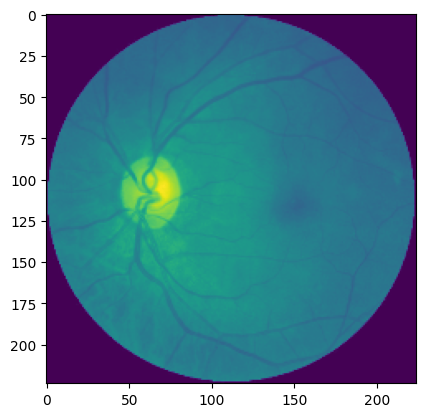

In [14]:
# Plot a sample image
plt.imshow(xtrain[0])

###Train the model using Support Vector Machine

In [15]:
# Reshape xtrain and ytrain to a 2D array-like format
n_samples = xtrain.shape[0]  # Number of samples
n_features = np.prod(xtrain.shape[1:])  # Number of features
xtrain_flattened = xtrain.reshape((n_samples, n_features))

n_samples = xtest.shape[0]  # Number of samples
n_features = np.prod(xtest.shape[1:])  # Number of features
xtest_flattened = xtest.reshape((n_samples, n_features))

In [16]:
xtrain_flattened.shape

(3725, 50176)

In [17]:
model =  SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced')
model.fit(xtrain_flattened, ytrain)

SVC(class_weight='balanced')

###Evaluation

In [19]:
print("Training Score:", model.score(xtrain_flattened, ytrain))
print("Testing Score:", model.score(xtest_flattened, ytest))

Training Score: 0.3264429530201342
Testing Score: 0.2695434646654159


###Prediction